<a href="https://colab.research.google.com/github/samarghz/my-awesome-repo/blob/main/Copy_of_Dog_vs_Cat_Classification_using_Transfer_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the kaggle library 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the DOG VS CAT dataset from kaggle 

In [ ]:
# kaggle api 
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:03<00:00, 190MB/s]
100% 812M/812M [00:04<00:00, 212MB/s]


In [ ]:

# extracting the compressed dataset 
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip' # this is the path of dogs vs cat .zip 

with ZipFile(dataset,'r') as zip: 
  zip.extractall()
  print('the dataset is extrected')



the dataset is extrected


In [ ]:
# extracting the train.zip
from zipfile import ZipFile

dataset='/content/train.zip' # this this the path of train.zip

with ZipFile(dataset,'r') as zip: 
  zip.extractall()
  print('the dataset is extrected')

the dataset is extrected


In [ ]:
! ls

dogs-vs-cats.zip  sample_data		test1.zip  train.zip
kaggle.json	  sampleSubmission.csv	train


In [ ]:
import os
path,dirs,files=next(os.walk('/content/train'))

file_count=len(files)
print('number od images in this train directory:',file_count)

number od images in this train directory: 25000


In [ ]:
file_names=os.listdir('/content/train')
print(file_names)
len(file_names)

['cat.9246.jpg', 'dog.2963.jpg', 'dog.2984.jpg', 'cat.7244.jpg', 'cat.6800.jpg', 'cat.10696.jpg', 'dog.5871.jpg', 'cat.5563.jpg', 'dog.2761.jpg', 'cat.10136.jpg', 'cat.4064.jpg', 'dog.6349.jpg', 'dog.6925.jpg', 'dog.11409.jpg', 'dog.6975.jpg', 'dog.7006.jpg', 'dog.990.jpg', 'cat.957.jpg', 'dog.292.jpg', 'cat.8580.jpg', 'dog.3985.jpg', 'cat.3862.jpg', 'dog.1165.jpg', 'cat.3407.jpg', 'cat.2960.jpg', 'dog.7355.jpg', 'dog.12422.jpg', 'dog.1799.jpg', 'dog.12173.jpg', 'cat.3469.jpg', 'cat.4797.jpg', 'cat.5386.jpg', 'dog.6214.jpg', 'dog.2668.jpg', 'dog.7898.jpg', 'dog.1868.jpg', 'dog.2623.jpg', 'dog.6708.jpg', 'cat.163.jpg', 'cat.6835.jpg', 'cat.7972.jpg', 'cat.9141.jpg', 'dog.824.jpg', 'dog.3816.jpg', 'cat.2912.jpg', 'cat.9468.jpg', 'cat.3423.jpg', 'dog.25.jpg', 'cat.3635.jpg', 'dog.540.jpg', 'cat.5699.jpg', 'dog.10946.jpg', 'cat.5253.jpg', 'dog.4987.jpg', 'dog.7918.jpg', 'dog.9298.jpg', 'cat.7942.jpg', 'dog.10299.jpg', 'dog.3178.jpg', 'cat.11073.jpg', 'cat.3418.jpg', 'cat.10858.jpg', 'dog.3

25000

## processing

In [ ]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


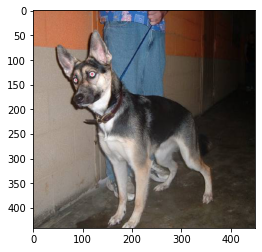

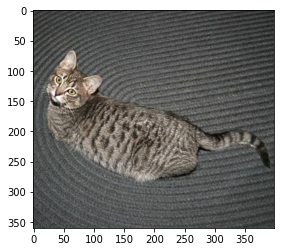

(360, 399, 3)

In [ ]:
# display dog image

img=mpimg.imread('/content/train/dog.2810.jpg') 
imgplot=plt.imshow(img)
plt.show()

# display cat image
 
img=mpimg.imread('/content/train/cat.1052.jpg')
imgplot=plt.imshow(img)
plt.show()
img.shape
 

---> all the images have different sizes 

In [ ]:
 file_names=os.listdir('/content/train')

 for i  in range(5):

   name=file_names[i]
   print(name[0:3])


cat
dog
dog
cat
cat


In [ ]:
dog_count=0
cat_count=0
for img_file in file_names:

  name=img_file[0:3]

  if name=='dog':

    dog_count+=1
  else: 
    cat_count+=1

print('dog:',dog_count)
print('cat:',cat_count)

dog: 12500
cat: 12500


In [ ]:
os.mkdir('/content/image_resized')

In [ ]:
original_folder_with_unresized_images='/content/train/'
resized_folder='/content/image_resized/'

In [ ]:
for i in range(2000):
  

  filename=os.listdir(original_folder_with_unresized_images)[i]
  img_path=original_folder_with_unresized_images+filename # expl: /content/train/dog.3427.jpg

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newimgpath=resized_folder+filename
  img.save(newimgpath)

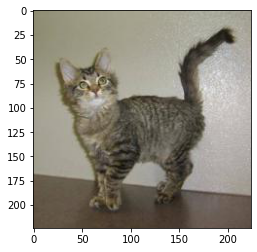

(224, 224, 3)

In [ ]:
img=mpimg.imread('/content/image_resized/cat.9246.jpg')
imgplt=plt.imshow(img)
plt.show()
img.shape

-----> the 2000 resized images are stocked in the folder image_resized

In [ ]:
# creating a for loop to assign labels 
filenames=os.listdir('/content/image_resized')

labels=[]

for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
      labels.append(0) 


In [ ]:
print(labels)
len(labels)
type(labels)

[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 

list

In [ ]:
# counting the images of dogs and cats 
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1017  983]


## converting all the resize images to numpy arrays 

In [ ]:
import cv2
import glob 

In [ ]:
image_directory='/content/image_resized/'
image_extension=['png','jpg']

files=[]


[files.extend(glob.glob(image_directory+ '*.' + e)) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files ])



In [ ]:
print(dog_cat_images)
dog_cat_images[1].shape
type(dog_cat_images)

[[[[112 137 139]
   [112 137 139]
   [113 138 140]
   ...
   [141 154 156]
   [142 155 157]
   [145 158 160]]

  [[112 137 139]
   [112 137 139]
   [113 138 140]
   ...
   [145 158 160]
   [146 159 161]
   [147 160 162]]

  [[112 137 139]
   [113 138 140]
   [113 138 140]
   ...
   [146 159 161]
   [145 158 160]
   [145 158 160]]

  ...

  [[ 66  82  95]
   [ 65  81  94]
   [ 65  81  94]
   ...
   [ 71  80  94]
   [ 69  78  92]
   [ 67  76  90]]

  [[ 66  82  95]
   [ 66  82  95]
   [ 65  81  94]
   ...
   [ 69  78  92]
   [ 67  76  90]
   [ 65  74  88]]

  [[ 67  83  96]
   [ 66  82  95]
   [ 65  81  94]
   ...
   [ 68  77  91]
   [ 66  75  89]
   [ 64  73  87]]]


 [[[  9   9   9]
   [ 13  13  13]
   [ 17  17  17]
   ...
   [ 68  80  84]
   [ 67  79  83]
   [ 66  78  82]]

  [[ 12  12  12]
   [ 15  15  15]
   [ 18  18  18]
   ...
   [ 72  84  88]
   [ 69  81  85]
   [ 68  80  84]]

  [[ 15  15  15]
   [ 17  17  17]
   [ 19  19  19]
   ...
   [ 77  89  93]
   [ 73  85  89]
   [ 71  83

numpy.ndarray

In [ ]:
x=dog_cat_images
y=np.asarray(labels)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

scaling the data 

In [ ]:
x_train=x_train/255
x_test=x_test/255

## building the neural network 

In [ ]:
import tensorflow as tf 
import tensorflow_hub as hub 

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 57s 1s/step - loss: 0.2403 - accuracy: 0.8963
Epoch 2/5
50/50 [==============================] - 48s 958ms/step - loss: 0.0803 - accuracy: 0.9725
Epoch 3/5
50/50 [==============================] - 49s 972ms/step - loss: 0.0579 - accuracy: 0.9844
Epoch 4/5
50/50 [==============================] - 50s 993ms/step - loss: 0.0446 - accuracy: 0.9850
Epoch 5/5
50/50 [==============================] - 48s 956ms/step - loss: 0.0346 - accuracy: 0.9906


In [ ]:
score, acc = model.evaluate(x_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

NameError: ignored

Predictive Systeme 

path of the image to be predicted :/content/dog.jpg


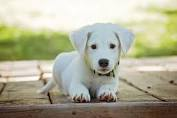

1/1 [==============================] - 0s 73ms/step
The image represents a Dog


In [ ]:
input_image_path=input('path of the image to be predicted :')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resized/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

path of the image to be predicted :/content/dogcat.jpg


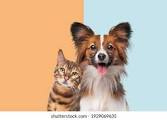

1/1 [==============================] - 0s 62ms/step
The image represents a Dog


In [ ]:
input_image_path=input('path of the image to be predicted :')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resized/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')